# Projet ML Non Supervisé - Kmeans 


L'objectif de ce projet est d'étudier la méthode des **K-Means (ou K-Moyennes)** pour créer des groupes (ou clusters) de films à partir de leur description en ayant scrapper des données au préalable.

Les K-Means (ou K-moyennes) font partie des méthodes d'**apprentissage non-supervisé** dans lesquelles la variable cible (Target) n'est pas connue. L'idée est de regrouper les éléments ayant des caractéristiques communes et de créer ainsi des clusters (ou groupes) bien différenciés les uns des autres.

<div>
<img src="k%20means.png" width="500"/>
</div>


Dans ce projet, nous allons travailler à partir de données à scrapper à partir du site IMdB qui contient notamment toutes les informations relatives à des films. 

A partir des résumés de films (**Plot Summary**) disponibles pour chaque film, l'objectif est d'extraire des caractéristiques (ou features) de films en utilisant les techniques de **NLP (Natural Language Processing)**. 
Les K-Means sont ensuite appliqués dans un second temps pour déterminer des clusters de films sur la base des features construites précédemment. 

### Instructions de suivi de projet : 

- Comme pour le suivi du projet de Machine Learning Supervisé, nous allons désigner un/une chef(fe) de projet qui devra nous restituer l'avancement et planifier les tâches 
- Vous devrez créer des réunions et y inviter Nora et Samira 
- Le projet durera 2 jours consécutifs : Lundi 29/06 et Mardi 30/06.
- Les groupes seront imposés. 
- Un groupe sera tiré au sort mardi en fin de journée et devra présenter son travail Jeudi en début de matinée pendant 15 minutes. Le seul support à utiliser sera votre notebook. Pour facilier vos échanges, nous vous conseillons d'utiliser Google Colab.



### Les étapes du projet sont listées ci-dessous : 
1. Scrapping du top 100 des films listés sur le site **`IMdB`** à cette url (en utilisant beautifoulSoup) : 'https://www.imdb.com/list/ls055592025/'. Vous devez récupérer les informations suivantes pour constituer un dataframe:
    - **titre du film** 
    - **genre**
    - **année** 
    - **synopsis**
    - **note numérique**
    
    
2. Preprocessing : Vous devez faire une veille sur les prétraitements nécessaires au NLP listés ci-après et les appliquer dans le bon ordre à vos données. Pour chacun des prétraitements, vous devrez **synthétiser** la méthode en quelques mots à l'écrit dans le notebook. Les traitements à utiliser sont les suivants:
    - **cos2 similarity**
    - **stemming**
    - **Normalisation**
    - **Stopwords**
    - **tokenization**
    
    
3. Classificaiton non supervisée : **`K-Means`**
    - Faire une **veille** sur l'algorithme et la synthétiser en quelques lignes dans le notebook
    - Lancer le modèle K-means pour **plusieurs valeurs de K** (nb clusters) en utilisant une liste et une boucle
    - Analyser les **silhouette scores** puis fixer le nombre K. Lancer le **modèle final**
    
    
4. **QUESTIONS BONUS** : Description des clusters. Ces questions sont à réaliser si le temps vous le permet et sont en aucun cas obligatoires.
    - Afficher le barplot des mots les plus fréquents 
    - Afficher le WordClould des centroides
    
    

In [58]:
import nltk
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
#from nltk.corpus import stowords

In [2]:
titre,genre,an,synopsis,notenum = [],[],[],[],[]
page_content = requests.get('https://www.imdb.com/list/ls091520106/').content
library_soup = BeautifulSoup(page_content, 'html.parser')
titre = [t.text for t in library_soup.select('h3 a[href]')]
genre = [g.text for g in library_soup.select('span.genre')]
an = [a.text for a in library_soup.select('span.lister-item-year')]
synopsis = [s.text for s in library_soup.find_all('p', class_='')][1:]
notenum = [float(n.text) for n in library_soup.select('span.ipl-rating-star__rating') if len(n.text)==3]
notem=np.mean([m for m in notenum])
notenum.append(notem)
notenum.append(notem)
df100 = pd.DataFrame({'titre':titre,'genre':genre,'année':an,'synopsis':synopsis,'note numérique':notenum})
print(df100.shape,'\n',df100.head())

(100, 5) 
                                 titre                               genre  \
0                          Les évadés                 \nDrama               
1                          Le parrain          \nCrime, Drama               
2             Le parrain, 2ème partie          \nCrime, Drama               
3  The Dark Knight: Le chevalier noir  \nAction, Crime, Drama               
4                 12 hommes en colère          \nCrime, Drama               

    année                                           synopsis  note numérique  
0  (1994)  \n    Two imprisoned men bond over a number of...             9.3  
1  (1972)  \n    The aging patriarch of an organized crim...             9.2  
2  (1974)  \n    The early life and career of Vito Corleo...             8.9  
3  (2008)  \n    When the menace known as the Joker wreak...             8.9  
4  (1957)  \n    A jury holdout attempts to prevent a mis...             8.9  


In [ ]:
#cos2 similarity

In [3]:
df100.head(10)

,titre,genre,année,synopsis,note numérique
0,Les évadés,\nDrama,(1994),\n Two imprisoned men bond over a number of...,9.3
1,Le parrain,"\nCrime, Drama",(1972),\n The aging patriarch of an organized crim...,9.2
2,"Le parrain, 2ème partie","\nCrime, Drama",(1974),\n The early life and career of Vito Corleo...,8.9
3,The Dark Knight: Le chevalier noir,"\nAction, Crime, Drama",(2008),\n When the menace known as the Joker wreak...,8.9
4,12 hommes en colère,"\nCrime, Drama",(1957),\n A jury holdout attempts to prevent a mis...,8.9
5,La liste de Schindler,"\nBiography, Drama, History",(1993),\n In German-occupied Poland during World W...,8.9
6,Le seigneur des anneaux: Le retour du roi,"\nAdventure, Drama, Fantasy",(2003),\n Gandalf and Aragorn lead the World of Me...,8.8
7,Pulp Fiction,"\nCrime, Drama",(1994),"\n The lives of two mob hitmen, a boxer, a ...",8.8
8,"Le bon, la brute et le truand",\nWestern,(1966),\n A bounty hunting scam joins two men in a...,8.5
9,Fight Club,\nDrama,(1999),\n An insomniac office worker and a devil-m...,8.8


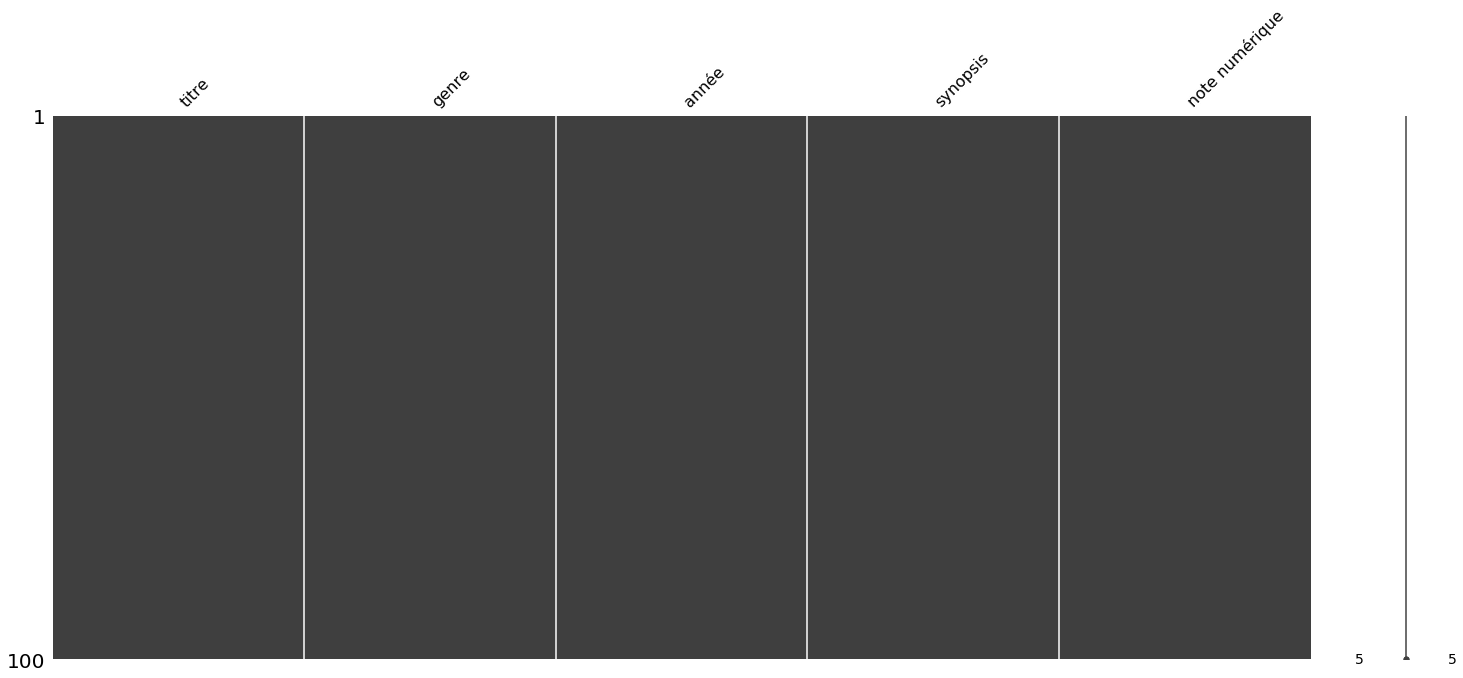

In [4]:
import missingno as  msno
msno.matrix(df100)

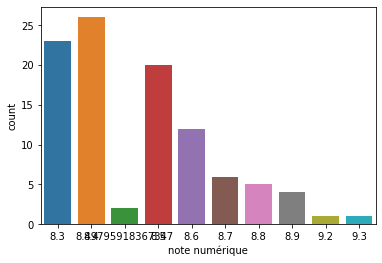

In [5]:
sns.countplot(x='note numérique',data=df100)

In [ ]:
##Normalisation

In [6]:
d1 =df100
d2=df100
Synopsis_df =d2.drop(['titre','genre','année','note numérique'],axis=1)
d2=df100
d3=df100
titre_df =d3.drop(['synopsis','genre','année','note numérique'],axis=1)


In [7]:
Synopsis_df.head(10)

,synopsis
0,\n Two imprisoned men bond over a number of...
1,\n The aging patriarch of an organized crim...
2,\n The early life and career of Vito Corleo...
3,\n When the menace known as the Joker wreak...
4,\n A jury holdout attempts to prevent a mis...
5,\n In German-occupied Poland during World W...
6,\n Gandalf and Aragorn lead the World of Me...
7,"\n The lives of two mob hitmen, a boxer, a ..."
8,\n A bounty hunting scam joins two men in a...
9,\n An insomniac office worker and a devil-m...


In [8]:
titre_df.head(10)

,titre
0,Les évadés
1,Le parrain
2,"Le parrain, 2ème partie"
3,The Dark Knight: Le chevalier noir
4,12 hommes en colère
5,La liste de Schindler
6,Le seigneur des anneaux: Le retour du roi
7,Pulp Fiction
8,"Le bon, la brute et le truand"
9,Fight Club


In [9]:
Synopsis_df = Synopsis_df.astype(str).apply(lambda x: x.str.lower())
print (Synopsis_df)

                                             synopsis
0   \n    two imprisoned men bond over a number of...
1   \n    the aging patriarch of an organized crim...
2   \n    the early life and career of vito corleo...
3   \n    when the menace known as the joker wreak...
4   \n    a jury holdout attempts to prevent a mis...
..                                                ...
95  \n    a new york city advertising executive go...
96  \n    in the future, a sadistic gang leader is...
97  \n    unscrupulous boxing promoters, violent b...
98  \n    amélie is an innocent and naive girl in ...
99  \n    the tramp cares for an abandoned child, ...

[100 rows x 1 columns]


## Tokenisation

In [80]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
df = pd.DataFrame(Synopsis_df)
#print(df)
lol = df.values.tolist()
lol
stemmer = SnowballStemmer("english")
# Sentences to be stemmed.
data =  lol
# Create the Pandas dataFrame.
df = pd.DataFrame(data, columns = ['mots décomposer']) 
# Split the sentences to lists of words.
df['mots décomposer'] = df['mots décomposer'].str.split()

# Make sure we see the full column.
pd.set_option('display.max_colwidth', -1)

# Print dataframe.
df 

,mots décomposer
0,"[two, imprisoned, men, bond, over, a, number, of, years,, finding, solace, and, eventual, redemption, through, acts, of, common, decency.]"
1,"[the, aging, patriarch, of, an, organized, crime, dynasty, transfers, control, of, his, clandestine, empire, to, his, reluctant, son.]"
2,"[the, early, life, and, career, of, vito, corleone, in, 1920s, new, york, city, is, portrayed,, while, his, son,, michael,, expands, and, tightens, his, grip, on, the, family, crime, syndicate.]"
3,"[when, the, menace, known, as, the, joker, wreaks, havoc, and, chaos, on, the, people, of, gotham,, batman, must, accept, one, of, the, greatest, psychological, and, physical, tests, of, his, ability, to, fight, injustice.]"
4,"[a, jury, holdout, attempts, to, prevent, a, miscarriage, of, justice, by, forcing, his, colleagues, to, reconsider, the, evidence.]"
...,...
95,"[a, new, york, city, advertising, executive, goes, on, the, run, after, being, mistaken, for, a, government, agent, by, a, group, of, foreign, spies.]"
96,"[in, the, future,, a, sadistic, gang, leader, is, imprisoned, and, volunteers, for, a, conduct-aversion, experiment,, but, it, doesn't, go, as, planned.]"
97,"[unscrupulous, boxing, promoters,, violent, bookmakers,, a, russian, gangster,, incompetent, amateur, robbers, and, supposedly, jewish, jewelers, fight, to, track, down, a, priceless, stolen, diamond.]"
98,"[amélie, is, an, innocent, and, naive, girl, in, paris, with, her, own, sense, of, justice., she, decides, to, help, those, around, her, and,, along, the, way,, discovers, love.]"


## Suppression des stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

In [105]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize     
stop_words = set(stopwords.words('english'))   
word_tokens = word_tokenize()  
filtered_sentence = [w for w in word_tokens if not w in stop_words]   
filtered_sentence = []  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
print(word_tokens) 
print(filtered_sentence)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\pierremarie/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\pierremarie\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [113]:
Synopsis_df1=Synopsis_df.astype(str)

## Python stemming

In [114]:
# import these modules 
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
#word_tokens = word_tokenize()
ps = PorterStemmer() 
[ps.stem(word) for word in word_tokenize(Synopsis_df1.lower())]
# choose some words to be stemmed 

AttributeError: 'DataFrame' object has no attribute 'lower'